In [1]:
# Load modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import netCDF4

# Show plots in the notebook
%matplotlib inline

## 1. Niño 3.4 index

First read in the data and show it

In [10]:
SST = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
SST

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

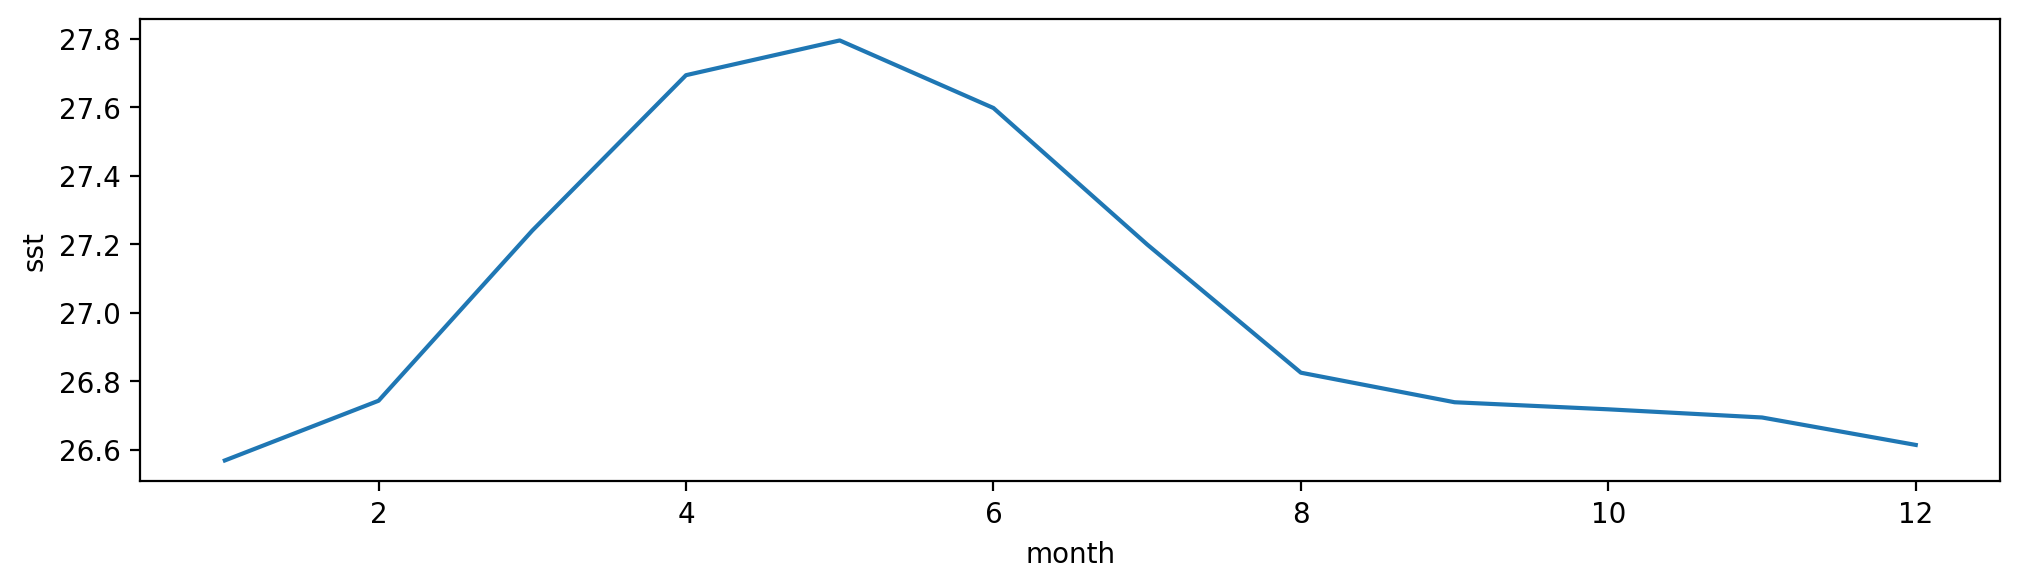

In [97]:
# Get the nino region and calculate the mean sst
nino_sst = SST['sst'].sel(lat = slice(-5,5), lon = slice(190,240))
nino_sst_mean = nino_sst.mean(dim= ['lat','lon'])

# Calculate the climatology
clima = nino_sst_mean.groupby('time.month')

# Plot the climatology
fig, ax = plt.subplots(figsize=(12,3), dpi=200)
clima.mean(dim='time').plot()

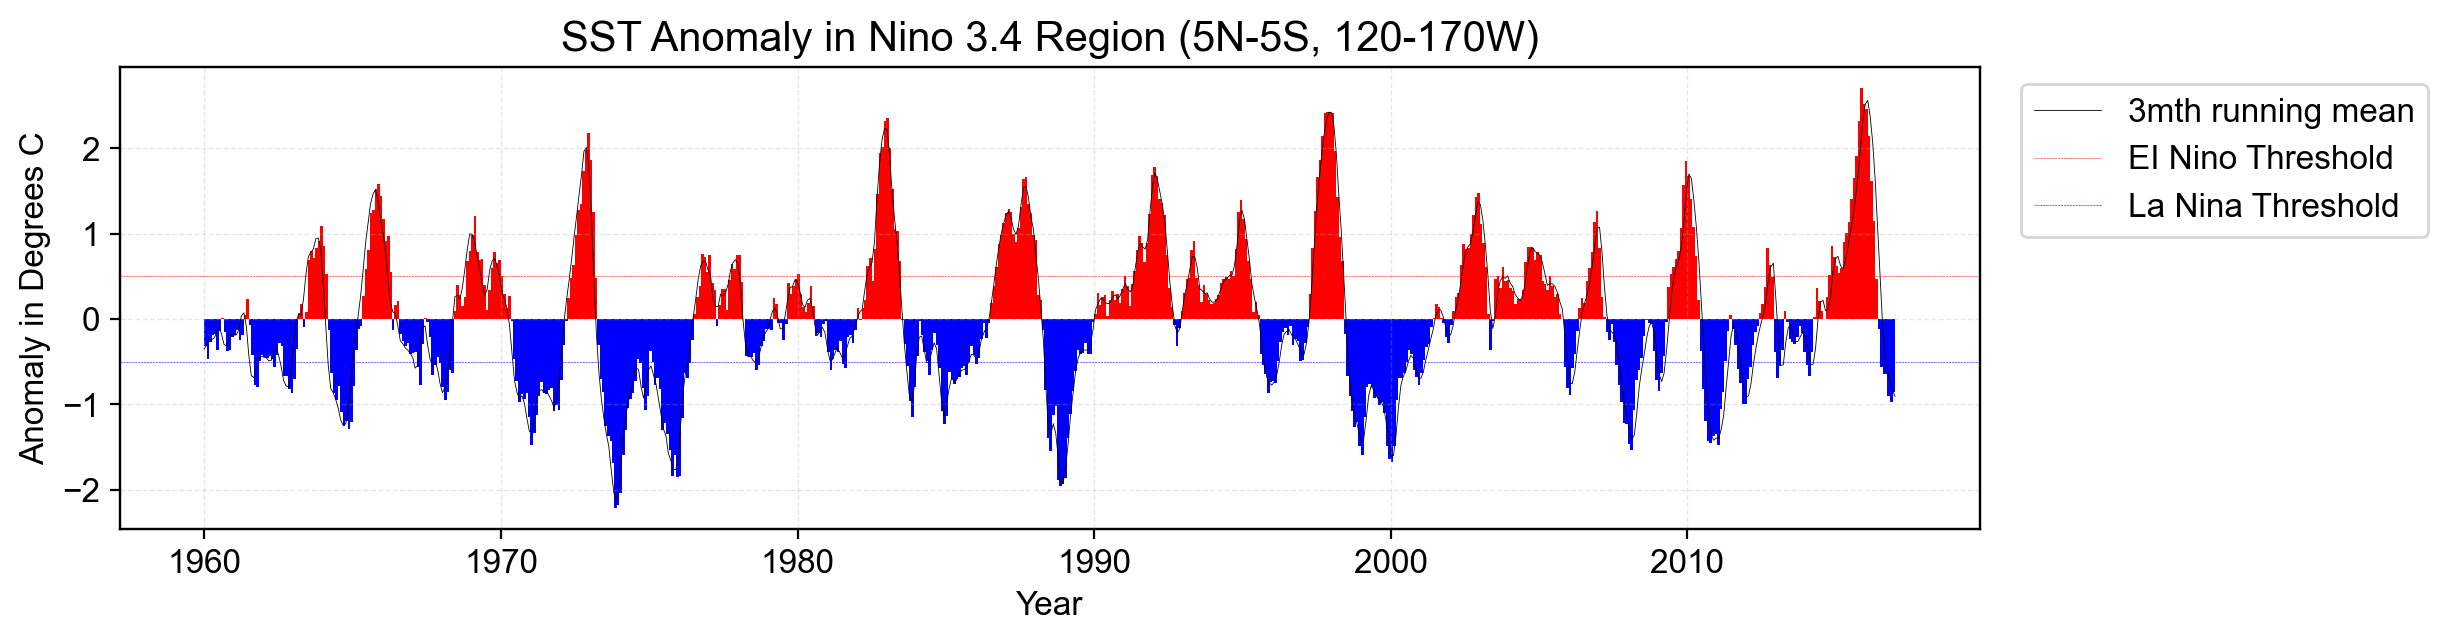

In [100]:
# Calculate the anomaly
nino_ano = clima - clima.mean(dim='time')
temp = nino_ano.to_dataframe().drop('month',axis = 1)

# Rolling the data to
nino_ano_roll = nino_ano.rolling(time = 3, center = True).mean()

# Set the size of figure
fig, ax = plt.subplots(figsize=(12,3), dpi=200, sharex=True)

# Set the legend
font01 = {'family':'Arial', 'weight':'normal','size':15}
font02 = {'family':'Arial', 'weight':'normal','size':12}
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)', font01)
plt.xlabel('Year',font02)
plt.ylabel('Anomaly in Degrees C', font02)
plt.xticks(fontproperties = 'Arial', fontsize = 12)
plt.yticks(fontproperties = 'Arial', fontsize = 12)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.3)

# Set Color of the figure, I learn this from chatGPT but type it by myself after understanding 
# this line of code
colors = ['r' if value > 0 else 'b' for value in nino_ano.values]

# Plot the bar chart
ax.bar(temp.index, temp['sst'], width=32, color = colors)

# Plot the line chart on the bar chart
ax2 = ax.twiny()
ax2.plot(nino_ano_roll,'k',linewidth = 0.3, label = '3mth running mean')
ax2.xaxis.set_visible(False)


# Add the horizantal line of 0.5 Degree C
plt.axhline(y = 0.5, linewidth = 0.2, color = 'r', linestyle = '--', label = 'EI Nino Threshold')
#plt.legend(labels = ['EI Nino Threshold'])
plt.axhline(y = -0.5, linewidth = 0.2, color = 'b', linestyle = '--', label = 'La Nina Threshold')
plt.legend(loc = 'upper right', prop = font02, bbox_to_anchor=(1.25, 1))

The first two questions were computed as required. However, significant optimizations were needed for the second question to achieve an image similar to the example.

## 2. Earth’s energy budget

In [101]:
# Read the ncfile in
TOA = xr.open_dataset('CERES_EBAF-TOA_200003-201701.nc')

In [102]:
# Show the information of TOA dataset
TOA

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

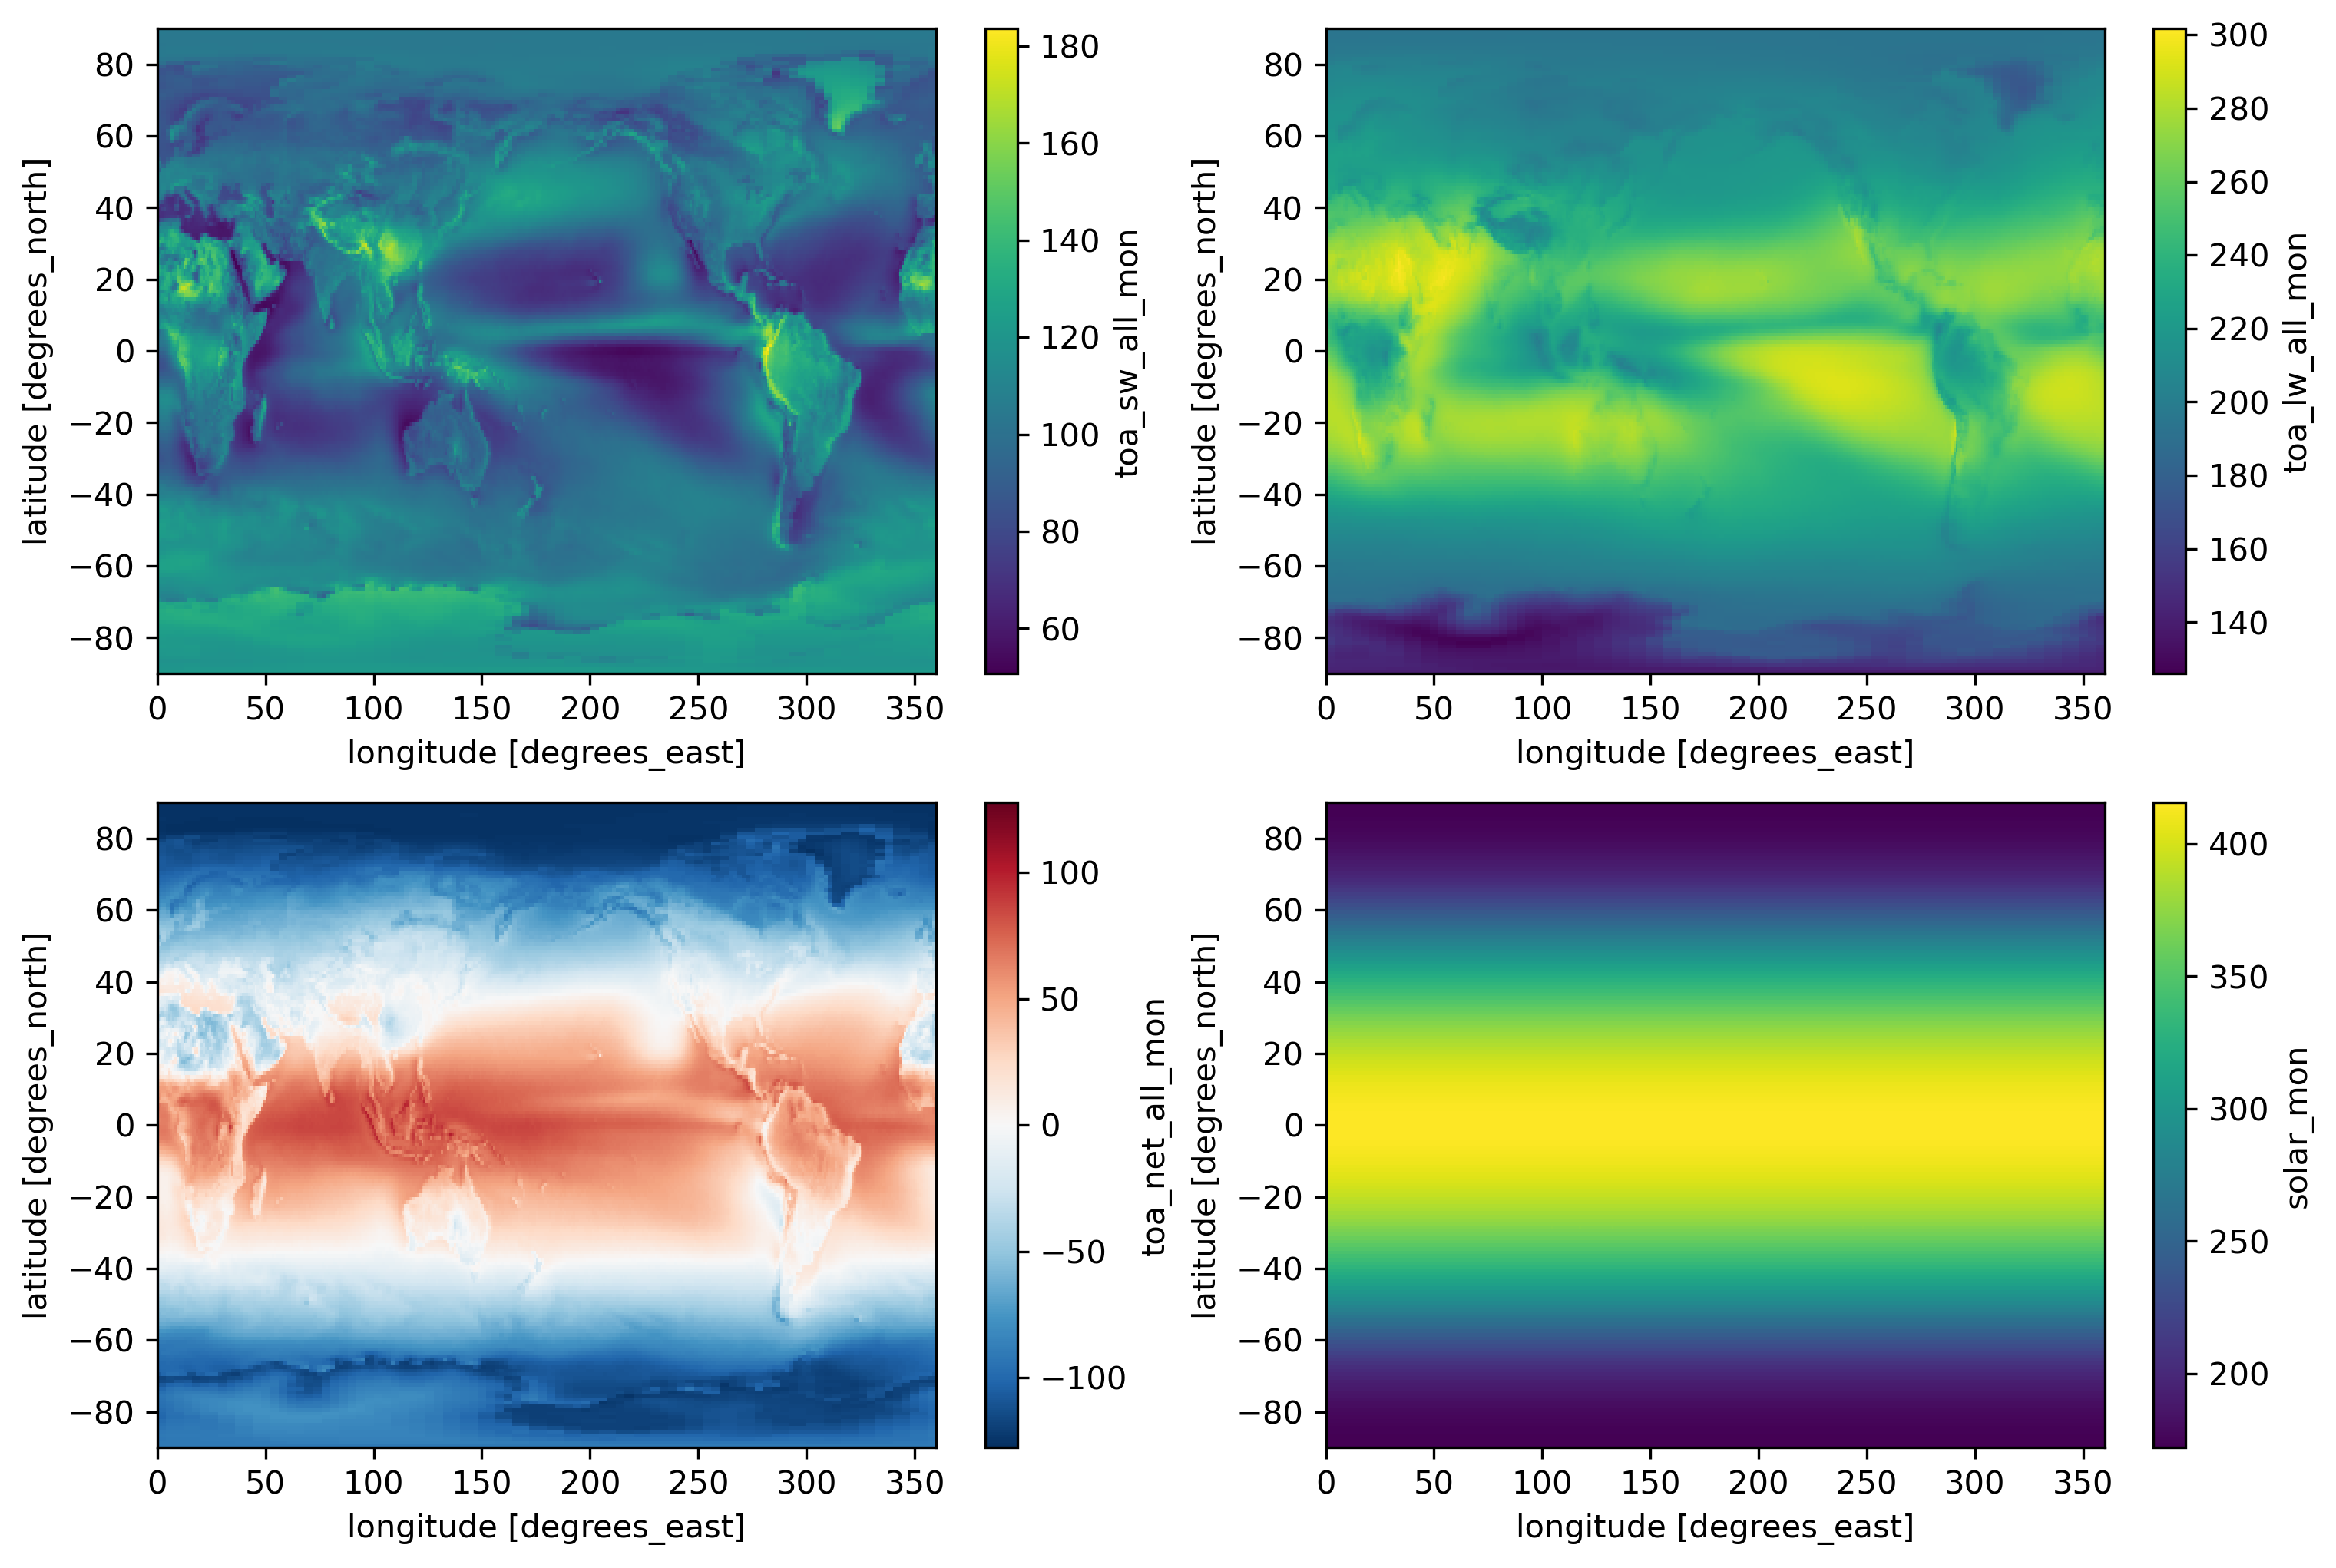

In [103]:
# Calculate the time-mean data for short wave, long wave and solar radiation for all-sky condition
toa_sw_all_mean = TOA['toa_sw_all_mon'].mean(dim = 'time')
toa_lw_all_mean = TOA['toa_lw_all_mon'].mean(dim = 'time')
toa_net_all_mean = TOA['toa_net_all_mon'].mean(dim = 'time')
solar_mean = TOA['solar_mon'].mean(dim = 'time')

# Plot the data
fig = plt.figure(figsize=(12,8), dpi=300)
ax = plt.subplot(2,2,1)
toa_sw_all_mean.plot()

ax = plt.subplot(2,2,2)
toa_lw_all_mean.plot()

ax = plt.subplot(2,2,3)
toa_net_all_mean.plot()

ax = plt.subplot(2,2,4)
solar_mean.plot()


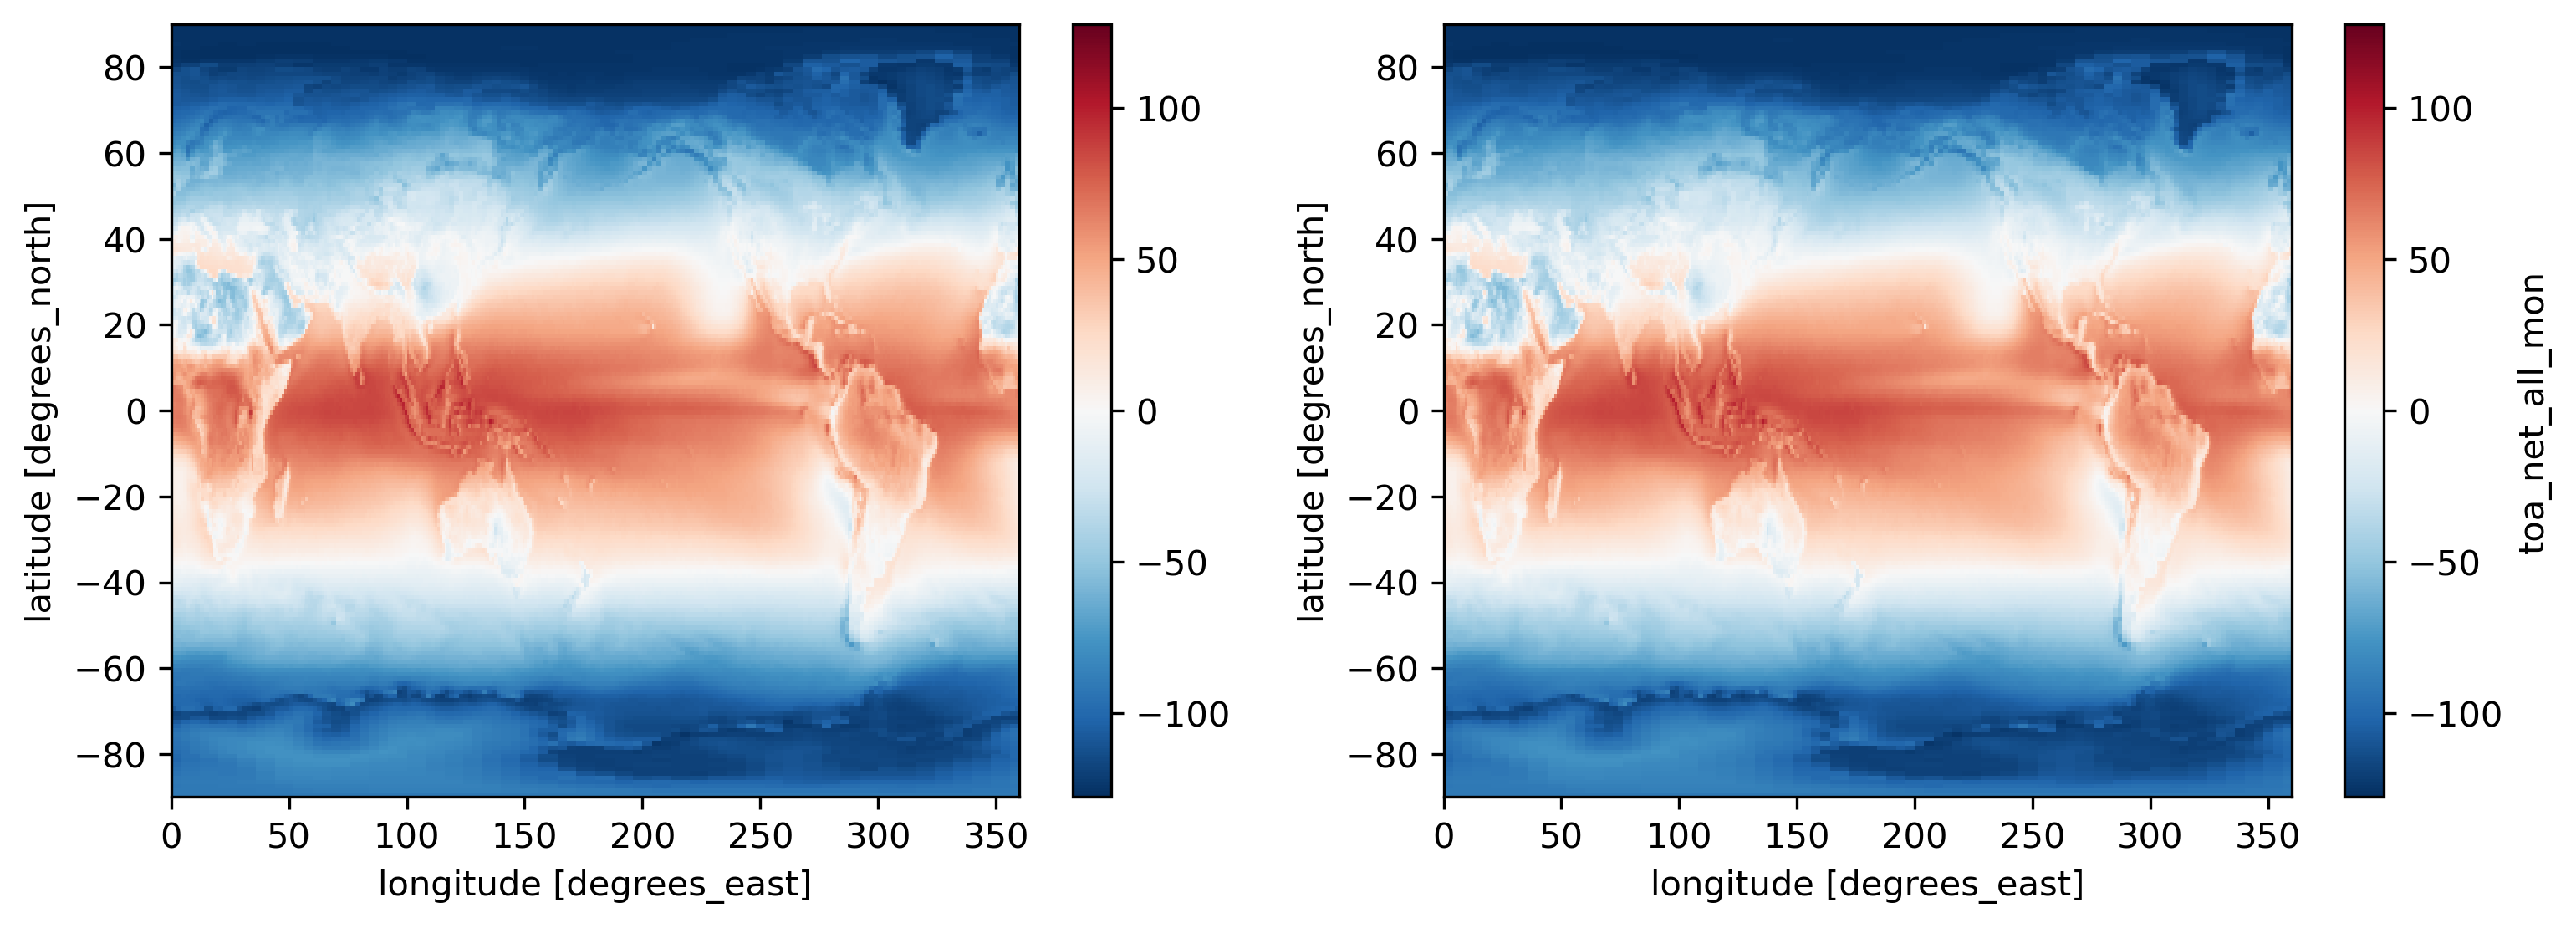

In [104]:
# Calculate the sum of lw, sw and solar radiation
toa_sum = solar_mean - toa_sw_all_mean - toa_lw_all_mean

# Plot to compare the toa_sum and toa_net_all_mean
fig = plt.figure(figsize=(12,4), dpi=300)

ax = plt.subplot(1,2,1)
toa_sum.plot()

ax = plt.subplot(1,2,2)
toa_net_all_mean.plot()

It can be seen that the sum of longwave, shortwave, and solar radiation is roughly equal to the TOA net flux.

2.2 The calculation results indicate that the longwave radiation equals the "total outgoing" in the diagram. The shortwave radiation is equivalent to the sum of "reflected by clouds & atmosphere" and "reflected by surface" in the diagram. Solar radiation also corresponds to the "incoming solar radiation" in the diagram.

In [105]:
# Calculate the weight at different latitude
weight = np.cos(np.deg2rad(TOA.lat))

# Calculate the weighter solar income, lw, and sw
solar_income = solar_mean.weighted(weight).mean().values
lw_outcome = toa_lw_all_mean.weighted(weight).mean().values
sw_outcome = toa_sw_all_mean.weighted(weight).mean().values
print('The income solar radiation is: ', solar_income, 'W/m2')
print('The outcome longwave radiation is: ', lw_outcome, 'W/m2')
print('The outcome shortwave radiation is: ', sw_outcome, 'W/m2')

The income solar radiation is:  340.28354 W/m2
The outcome longwave radiation is:  240.2667 W/m2
The outcome shortwave radiation is:  99.138596 W/m2


2.3 Use `mean()` to calculate the total amount of net radiation in each 1-degree latitude band

Text(0.5, 1.0, 'Net radiation in each 1-degree latitude band')

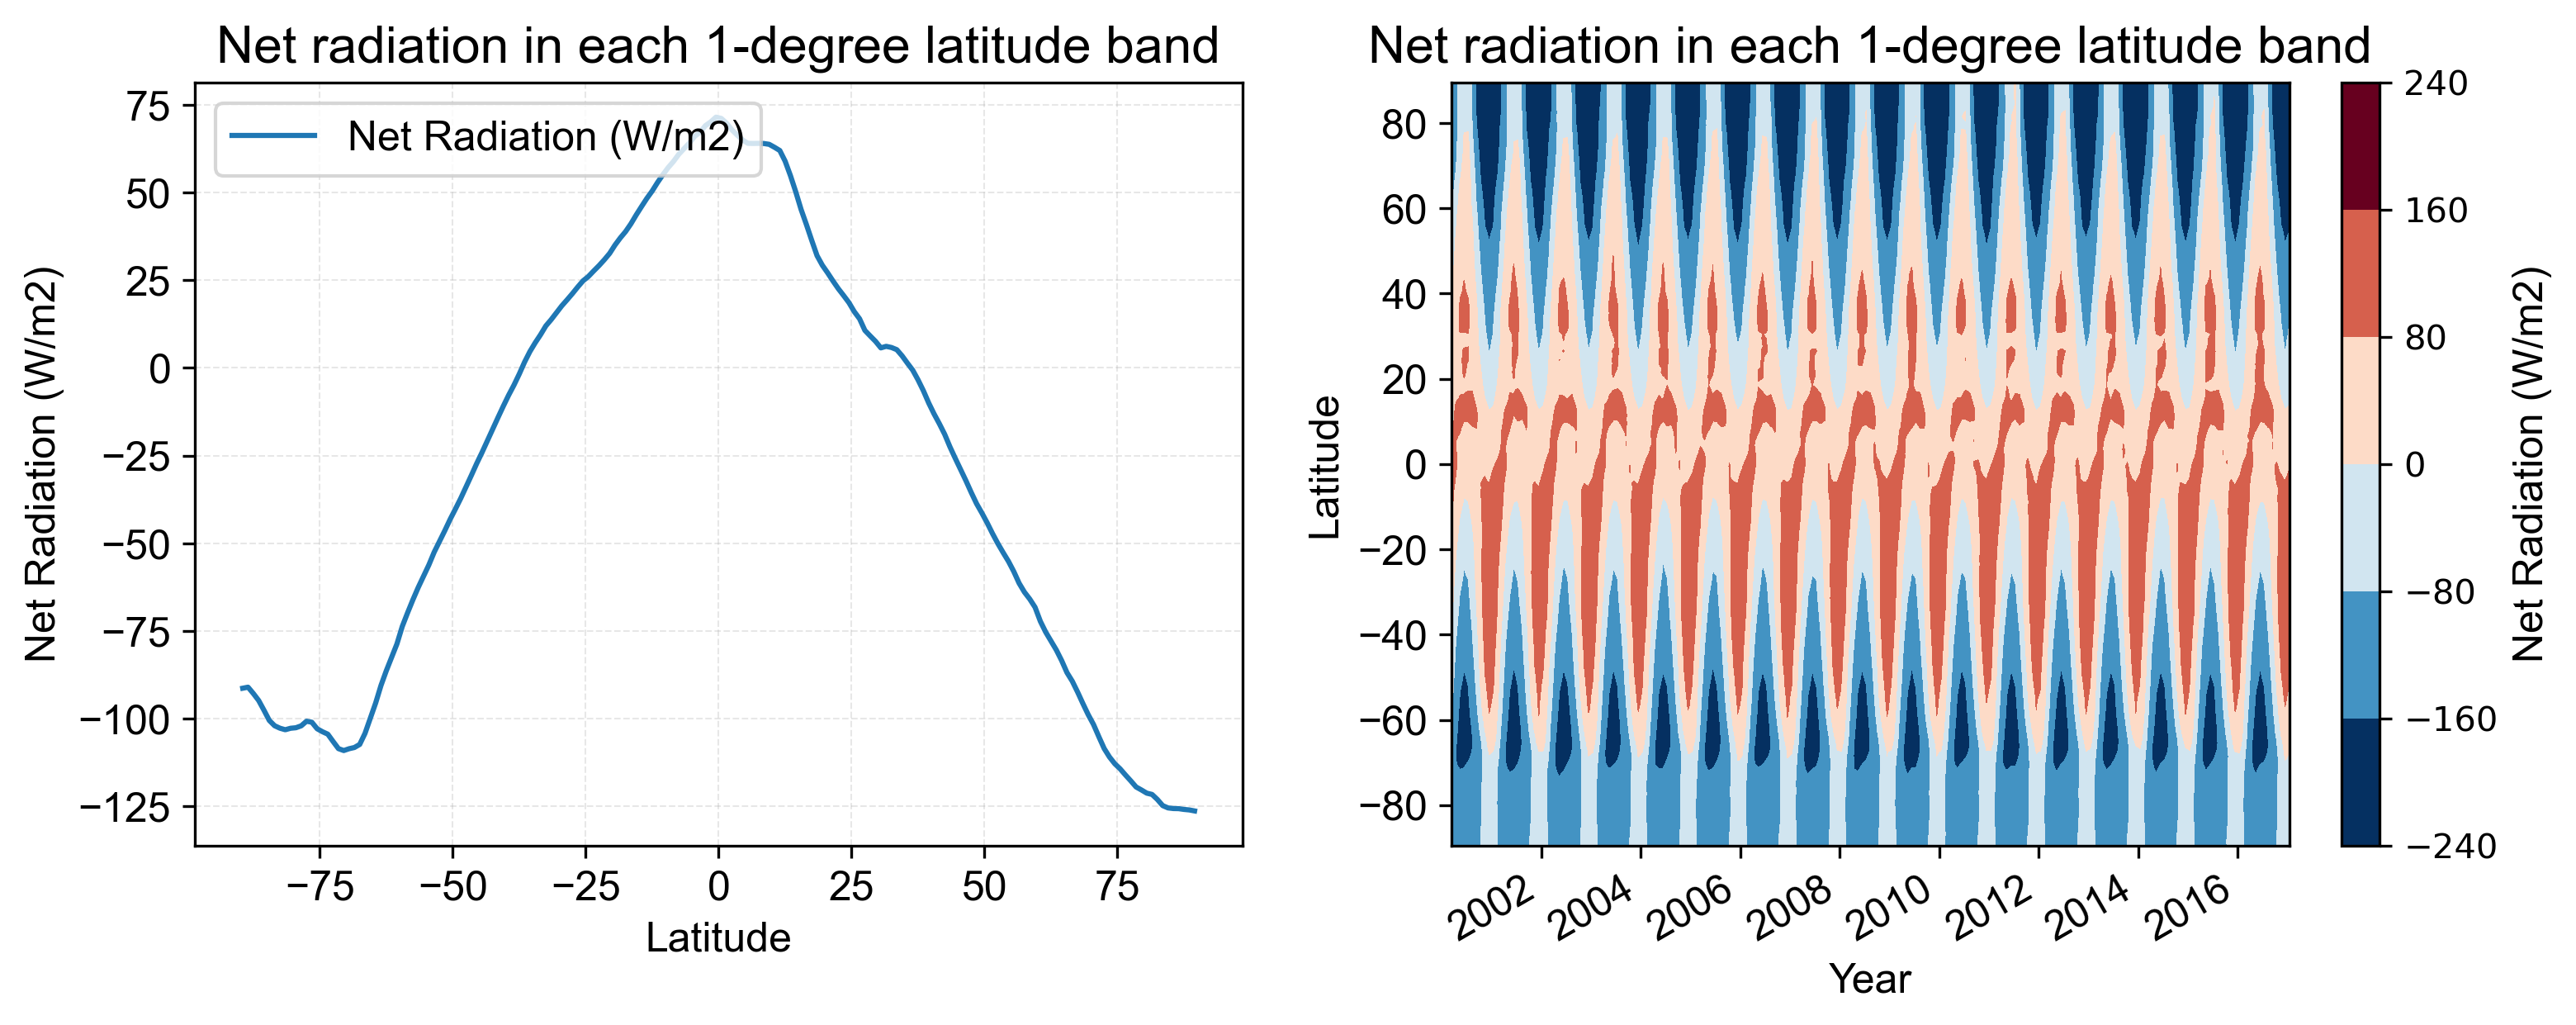

In [106]:
# Calculate the net radiation in 1 degree latitude band
toa_net_all_latmean = toa_net_all_mean.mean(dim = 'lon')

# Set the font and title
font01 = {'family':'Arial', 'weight':'normal','size':15}
font02 = {'family':'Arial', 'weight':'normal','size':12}
fig = plt.figure(figsize=(12,4), dpi=300)

# Plot the data
ax = plt.subplot(1,2,1)
toa_net_all_latmean.plot(label = 'Net Radiation (W/m2)')
plt.xlabel('Latitude',font02)
plt.ylabel('Net Radiation (W/m2)', font02)
plt.xticks(fontproperties = 'Arial', fontsize = 12)
plt.yticks(fontproperties = 'Arial', fontsize = 12)
plt.title('Net radiation in each 1-degree latitude band', font01)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.3)

plt.legend(loc = 'upper left', prop = font02)

# If the time information is also wanted
# Calculate 
toa_net_time_latmean = TOA['toa_net_all_mon'].mean(dim = 'lon')

# Plot
ax = plt.subplot(1,2,2)
contour = toa_net_time_latmean.plot.contourf(x='time')

# Add color bar and set label
contour.colorbar.set_label('Net Radiation (W/m2)',fontproperties = 'Arial', fontsize = 12)

# Add label and title
plt.xlabel('Year',font02)
plt.ylabel('Latitude', font02)
plt.xticks(fontproperties = 'Arial', fontsize = 12)
plt.yticks(fontproperties = 'Arial', fontsize = 12)
plt.title('Net radiation in each 1-degree latitude band', font01)

2.4 Utilize the `where()` function to distinguish between high and low cloud area regions and plot

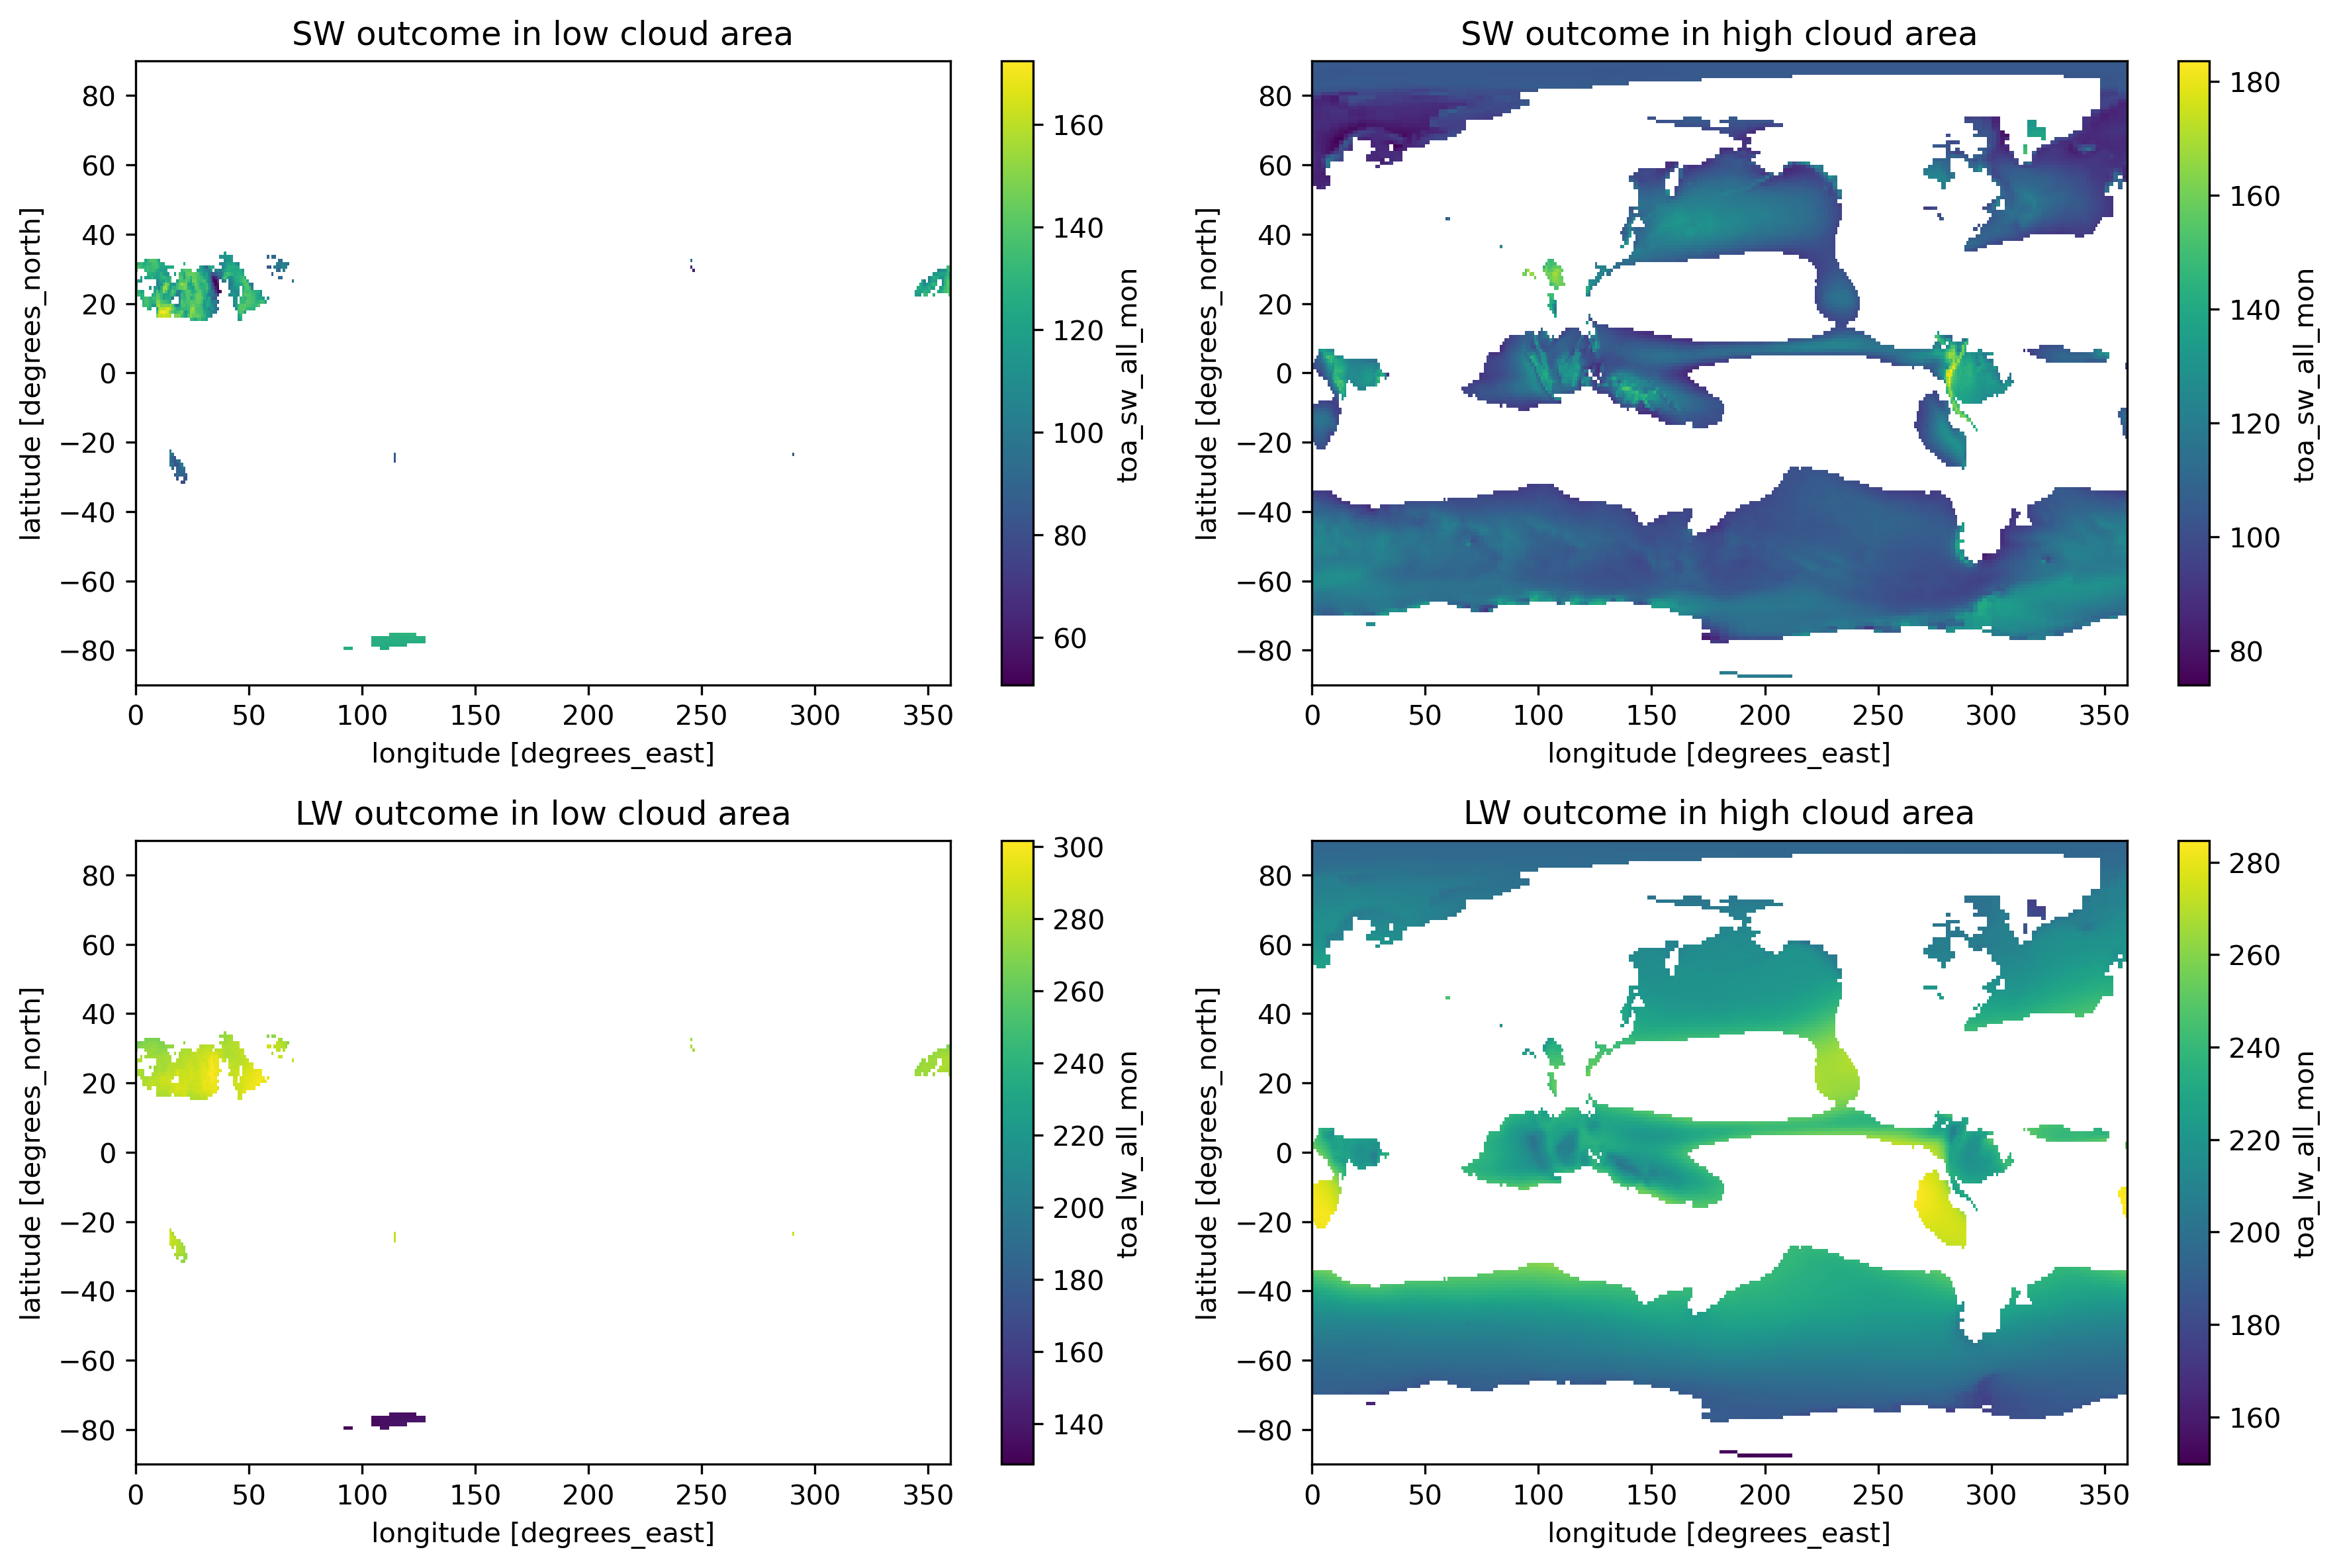

In [107]:
# Calculate the average cloud area
cld_area_mean = TOA['cldarea_total_daynight_mon'].mean(dim = 'time')

# Mask the sw and lw data
toa_sw_masked_low = toa_sw_all_mean.where(cld_area_mean <= 25)
toa_sw_masked_high = toa_sw_all_mean.where(cld_area_mean >= 75)
toa_lw_masked_low = toa_lw_all_mean.where(cld_area_mean <= 25)
toa_lw_masked_high = toa_lw_all_mean.where(cld_area_mean >= 75)

# Plot the data
fig = plt.figure(figsize=(12,8), dpi=300)
ax = plt.subplot(2,2,1)
toa_sw_masked_low.plot()
ax.set_title('SW outcome in low cloud area')

ax = plt.subplot(2,2,2)
toa_sw_masked_high.plot()
ax.set_title('SW outcome in high cloud area')

ax = plt.subplot(2,2,3)
toa_lw_masked_low.plot()
ax.set_title('LW outcome in low cloud area')

ax = plt.subplot(2,2,4)
toa_lw_masked_high.plot()
ax.set_title('LW outcome in high cloud area')

plt.tight_layout()

2.5 The results indicate that the shortwave radiation in the high and low cloud regions is completely opposite. Longwave radiation remains stable in the high cloud region, while there is a noticeable diurnal variation in the low cloud region.

The outcome longwave radiation is at high cloud area is :  223.76877 W/m2
The outcome shortwave radiation is at high cloud area is:  109.20795 W/m2
The outcome longwave radiation is at low cloud area is :  280.6622 W/m2
The outcome shortwave radiation is at low cloud area is:  122.5522 W/m2


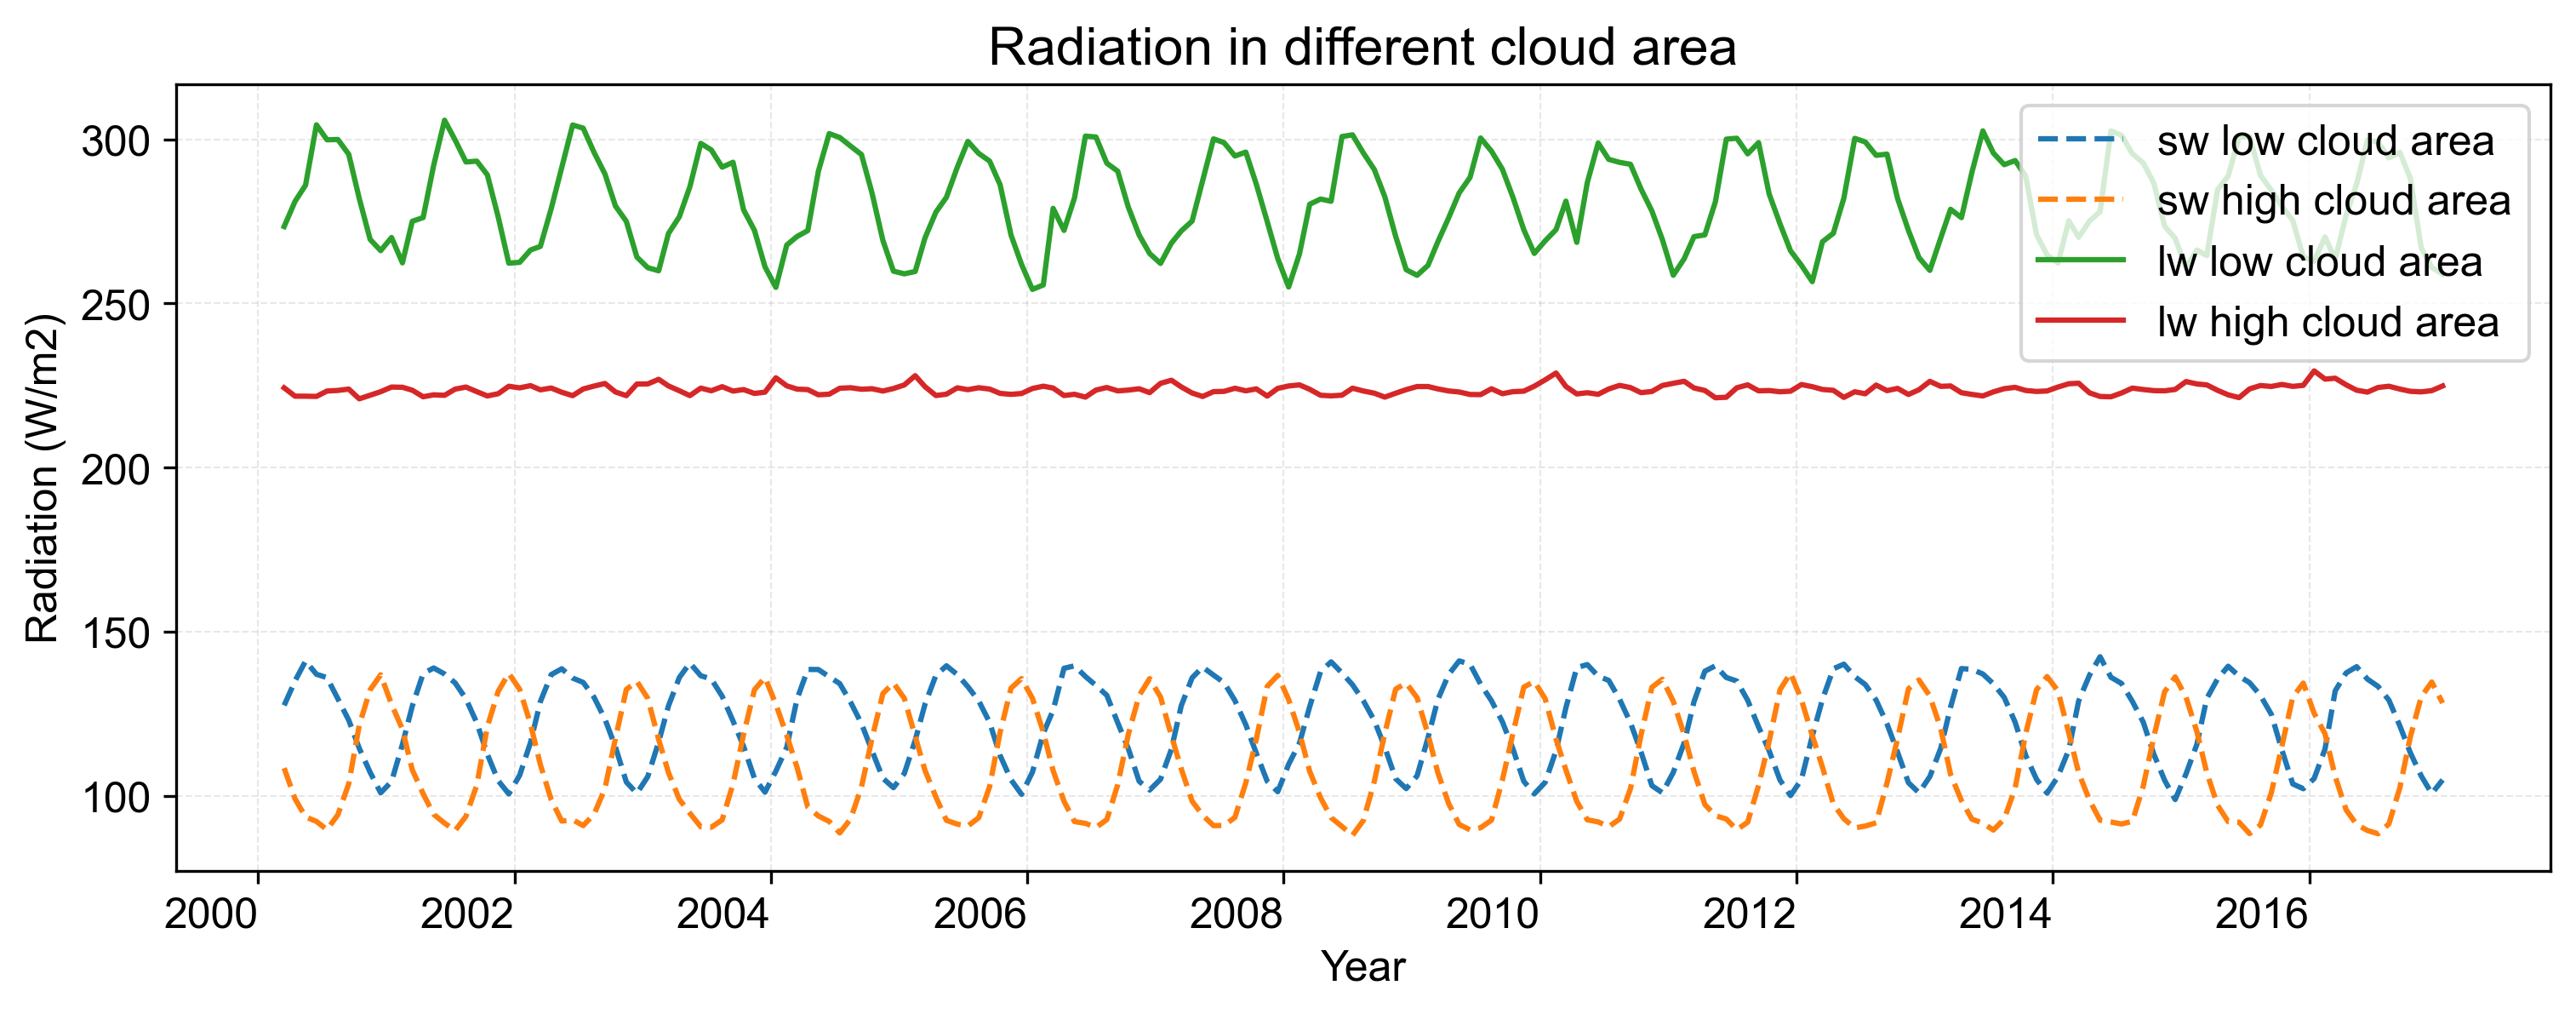

In [109]:
# Calculate the weighted mean value of sw and lw outcoming
lw_outcome_low = toa_lw_masked_low.weighted(weight).mean().values
sw_outcome_low = toa_sw_masked_low.weighted(weight).mean().values
lw_outcome_high = toa_lw_masked_high.weighted(weight).mean().values
sw_outcome_high = toa_sw_masked_high.weighted(weight).mean().values

# Print the value
print('The outcome longwave radiation is at high cloud area is : ', lw_outcome_high, 'W/m2')
print('The outcome shortwave radiation is at high cloud area is: ', sw_outcome_high, 'W/m2')
print('The outcome longwave radiation is at low cloud area is : ', lw_outcome_low, 'W/m2')
print('The outcome shortwave radiation is at low cloud area is: ', sw_outcome_low, 'W/m2')

# Calculate the time series mean value of sw and lw outcoming:
sw_low_time = TOA['toa_sw_all_mon'].where(cld_area_mean <= 25).weighted(weight).mean(dim = ['lon', 'lat'])
sw_high_time = TOA['toa_sw_all_mon'].where(cld_area_mean >= 75).weighted(weight).mean(dim = ['lon', 'lat'])
lw_low_time = TOA['toa_lw_all_mon'].where(cld_area_mean <= 25).weighted(weight).mean(dim = ['lon', 'lat'])
lw_high_time = TOA['toa_lw_all_mon'].where(cld_area_mean >= 75).weighted(weight).mean(dim = ['lon', 'lat'])

# Plot the 4 time series data in one figure
fig = plt.figure(figsize=(12,4), dpi=300)
sw_low_time.plot(linestyle='--', label = 'sw low cloud area')
sw_high_time.plot(linestyle='--', label = 'sw high cloud area')
lw_low_time.plot(label = 'lw low cloud area')
lw_high_time.plot(label = 'lw high cloud area')

# Set the labels and ticks
plt.xlabel('Year',font02)
plt.ylabel('Radiation (W/m2)', font02)
plt.xticks(fontproperties = 'Arial', fontsize = 12, rotation = 0)
plt.yticks(fontproperties = 'Arial', fontsize = 12)
plt.title('Radiation in different cloud area', font01)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.3)
plt.legend( prop = font02)

## 3. Explore a netCDF dataset

I selected the data output from the WRF-GC model for July 2019, as it is the dataset I am currently analyzing. Although these files lack the '.nc' extension, they are indeed netCDF files. The absence of the extension is likely an oversight during the output process. Due to the dataset spanning only one month and ozone variations primarily exhibiting diurnal and annual patterns, the monthly trend is not pronounced. Hence, for question 3.1, I remove the hourly cycle rather than monthly cycle, but the method are similar. In question 3.2, I created visualizations for other data in the netCDF file.

First read the data

In [2]:
temp_ozone = []
# Use for loop to read the o3 data
for d in range(1,29):
    for h in range(24):
        temp_file =  'F:/wrfout_d01_2019-07-' + str(d).zfill(2) + '_' + str(h).zfill(2) + '%3A00%3A00'
        temp_data = xr.open_dataset(temp_file)
        
        # Extract o3 data in PRD
        a = temp_data['o3'].isel(bottom_top=0).sel(south_north=slice(33,44), west_east=slice(127,141)).mean().values.item()
        temp_ozone.append(a)
        
        # 
        del temp_data

date_rng =  pd.date_range('20190701', '20190729',freq='1H', inclusive='left')

# Creat a DataFrame to store the data
data = {'Ozone': temp_ozone}
df = pd.DataFrame(data)
df.set_index(date_rng, inplace=True)

# Show the data
df

                        Ozone
2019-07-01 00:00:00  0.028664
2019-07-01 01:00:00  0.032781
2019-07-01 02:00:00  0.036798
2019-07-01 03:00:00  0.040538
2019-07-01 04:00:00  0.043591
...                       ...
2019-07-28 19:00:00  0.030430
2019-07-28 20:00:00  0.029813
2019-07-28 21:00:00  0.029100
2019-07-28 22:00:00  0.028729
2019-07-28 23:00:00  0.030867

[672 rows x 1 columns]


<Axes: >

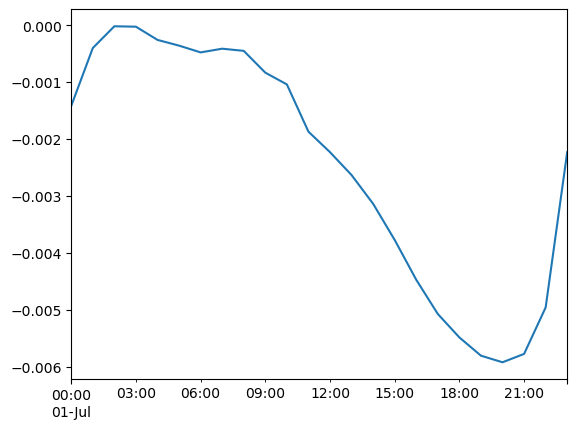

In [52]:
# Calculate the hourly average ozone concentration
df_h = df.groupby(df.index.hour).mean()
df_h.rename(columns = {'Ozone':'hourly average'}, inplace=True)

# Merge the Averaged dataframe and original dataframe
df_merged = df.merge(df_h, left_on=df.index.hour, right_index=True)

# Calculate the concentration time series with hourly seasonal cycle removed
df_merged['Ozone Anomaly'] = df_merged['Ozone'] - df_merged['hourly average']

# Use loc method to get the data in 2019-07-01 and then plot
data_0701 = df_merged.loc[df_merged.index.date == pd.to_datetime('2019-07-01').date()]
data_0701['Ozone Anomaly'].plot()

In [ ]:
# Extract other data needed 
temp_no2 = []
temp_no3 = []
# Use for loop to read the o3 data
for d in range(1,29):
    for h in range(24):
        temp_file =  'F:/wrfout_d01_2019-07-' + str(d).zfill(2) + '_' + str(h).zfill(2) + '%3A00%3A00'
        temp_data = xr.open_dataset(temp_file)
        
        # Extract no2 data in PRD
        a = temp_data['no2'].isel(bottom_top=0).sel(south_north=slice(33,44), west_east=slice(127,141)).mean().values.item()
        temp_no2.append(a)
        
        # Extract no3 data in PRD
        a = temp_data['no3'].isel(bottom_top=0).sel(south_north=slice(33,44), west_east=slice(127,141)).mean().values.item()
        temp_no3.append(a)
        # 
        del temp_data

date_rng =  pd.date_range('20190701', '20190729',freq='1H', inclusive='left')

# Creat a DataFrame to store the data
data_no2 = {'NO2': temp_no2}
df_no2 = pd.DataFrame(data_no2)
df_no2.set_index(date_rng, inplace=True)

data_no3 = {'NO3': temp_no3}
df_no3 = pd.DataFrame(data_no3)
df_no3.set_index(date_rng, inplace=True)


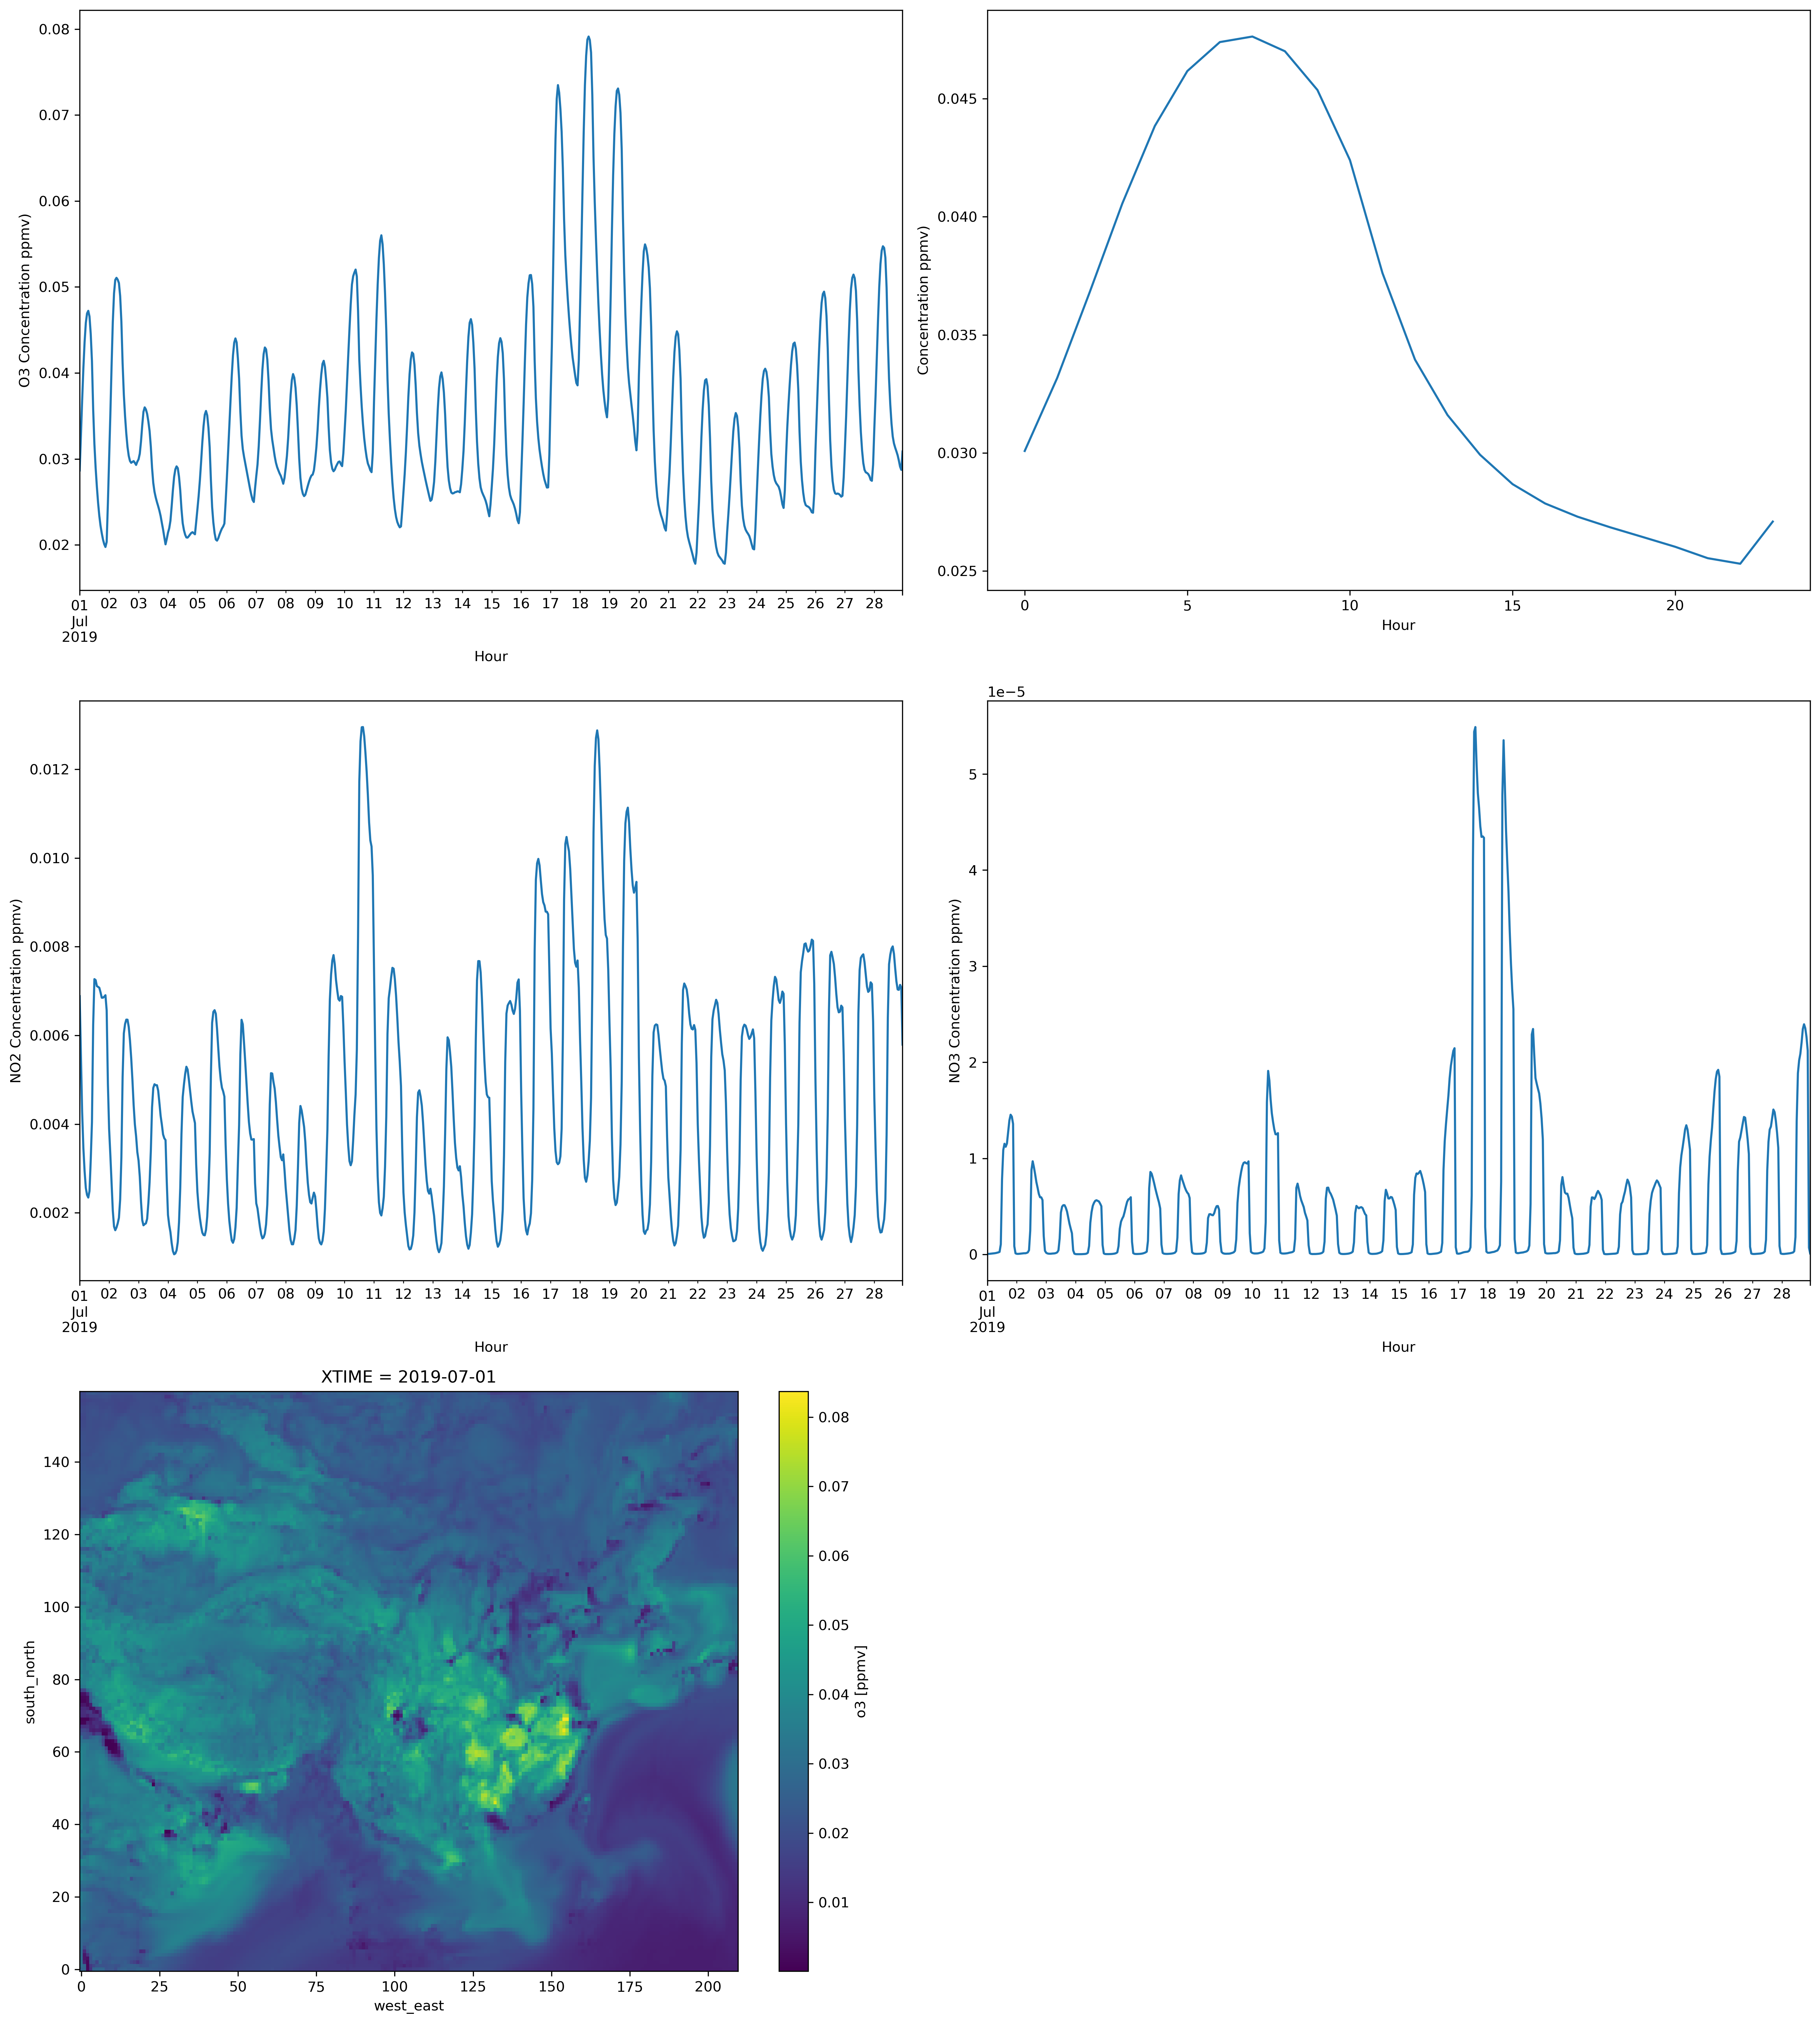

In [68]:
# Plot five another figure
fig = plt.figure(figsize=(18,20), dpi=300)

# 1. Show the total data 
ax = plt.subplot(3,2,5)
temp = xr.open_dataset('F:/wrfout_d01_2019-07-01_00%3A00%3A00')
temp['o3'].isel(bottom_top=0).plot()

# 2. Plot the o3 concentration in july
ax = plt.subplot(3,2,1)
df['Ozone'].plot()
plt.xlabel('Hour')
plt.ylabel('O3 Concentration ppmv)')

# 3. Plot O3 hourly average concentration
ax = plt.subplot(3,2,2)
df_h['hourly average'].plot()
plt.xlabel('Hour')
plt.ylabel('Concentration ppmv)')

# 4. Plot the NOx concentration in july

ax = plt.subplot(3,2,3)
df_no2['NO2'].plot()
plt.xlabel('Hour')
plt.ylabel('NO2 Concentration ppmv)')

ax = plt.subplot(3,2,4)
df_no3['NO3'].plot()
plt.xlabel('Hour')
plt.ylabel('NO3 Concentration ppmv)')

plt.tight_layout()
plt.show()